In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
df = sns.load_dataset("penguins")
print(df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

**Primera aproximación a los datos de forma general y su limpieza**

In [3]:
species = df["species"].to_numpy()
species = np.unique(species)
print(species)
print("---")
print(df.columns)

['Adelie' 'Chinstrap' 'Gentoo']
---
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


1. En el dataset hay tres tipos diferentes de especies de pingüinos, incluyendo datos sobre la isla en que habitan, características de sus picos y aletas, su masa corporal y su sexo.

In [4]:
df_null = df.isnull()
row_nans = []
for i in range(df_null.shape[0]):
  for j in range(df_null.shape[1]):
    if df_null.iloc[i,j] == True:
      row_nans.append(i)

df_dropped = df.drop(df.index[row_nans])
df = df_dropped
print(df)



    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

2. Utilicé df.isnull() para obtener el dataframe con True en donde hay valores faltantes, luego busqué que filas contienen dichos valores faltantes y las eliminé por el índice.

In [5]:
islands = df["island"].to_numpy()
unique_islands = np.unique(islands,return_counts=True)
print(unique_islands)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([163, 123,  47]))


3. La isla con mas pingüinitos es Biscoe, y evidentemente hay un disbalance entre el número de pingüinos por isla.





In [6]:
species = df["species"].to_numpy()
unique_species = np.unique(species,return_counts=True)
print(unique_species)


(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object), array([146,  68, 119]))


4. La especie con mas pingüinitos es Adelie, y evidentemente hay un disbalance entre el número de pingüinos por especie.

**Tendencias y visualizacion de las variables**

In [7]:
bill_lengths = df["bill_length_mm"].to_numpy()
bill_lengths_Adelie = []
bill_lengths_Chinstrap = []
bill_lengths_Gentoo = []

for i in range(df.shape[0]):
  if df.iloc[i,0] == "Adelie":
    bill_lengths_Adelie.append(bill_lengths[i])
  elif df.iloc[i,0] == "Chinstrap":
    bill_lengths_Chinstrap.append(bill_lengths[i])
  elif df.iloc[i,0] == "Gentoo":
    bill_lengths_Gentoo.append(bill_lengths[i])

bill_lengths_Adelie = np.array(bill_lengths_Adelie)
bill_lengths_Chinstrap = np.array(bill_lengths_Chinstrap)
bill_lengths_Gentoo = np.array(bill_lengths_Gentoo)

print(np.mean(bill_lengths_Adelie))
print(np.std(bill_lengths_Adelie))

print("---")

print(np.mean(bill_lengths_Chinstrap))
print(np.std(bill_lengths_Chinstrap))

print("---")

print(np.mean(bill_lengths_Gentoo))
print(np.std(bill_lengths_Gentoo))

38.82397260273973
2.6534625813231787
---
48.83382352941177
3.314611604171021
---
47.568067226890754
3.0930372544903855


5.

*   Para Adelie: Media = $38.82$, Std = $2.65$
*   Para Chinstrap: Media = $48.83$, Std = $3.31$
*   Para Gentoo: Media = $47.57$, Std = $3.09$




In [8]:
print(np.max(bill_lengths))
for i in range(len(bill_lengths)):
  if bill_lengths[i] == np.max(bill_lengths):
    w = i
    print(w)

print(df.iloc[w,0])

59.6
246
Gentoo


6. El pingüino con el pico mas largo ($59.6 \; mm$) es de la especie Gentoo.

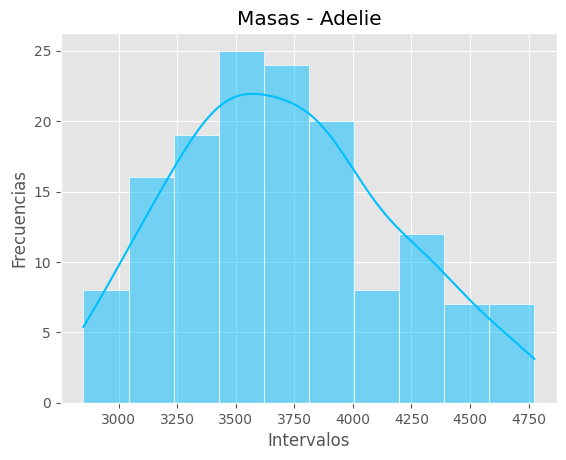

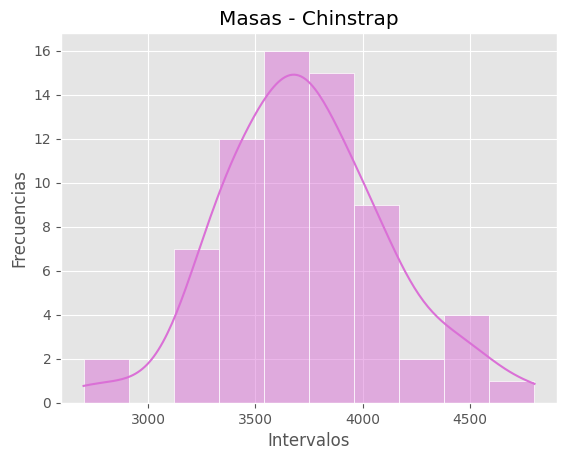

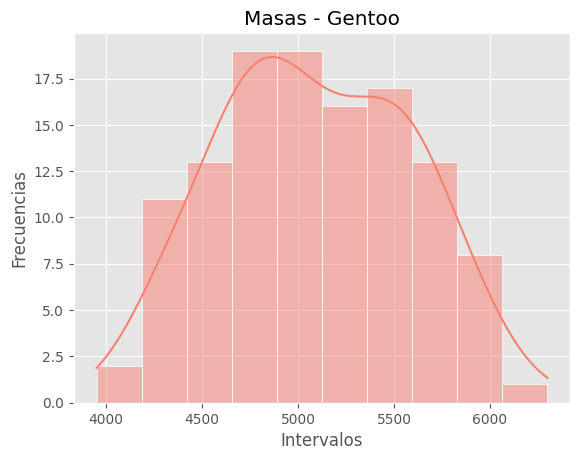

In [9]:
body_masses = df["body_mass_g"].to_numpy()
body_masses_Adelie = []
body_masses_Chinstrap = []
body_masses_Gentoo = []

for i in range(df.shape[0]):
  if df.iloc[i,0] == "Adelie":
    body_masses_Adelie.append(body_masses[i])
  elif df.iloc[i,0] == "Chinstrap":
    body_masses_Chinstrap.append(body_masses[i])
  elif df.iloc[i,0] == "Gentoo":
    body_masses_Gentoo.append(body_masses[i])

body_masses_Adelie = np.array(body_masses_Adelie)
body_masses_Chinstrap = np.array(body_masses_Chinstrap)
body_masses_Gentoo = np.array(body_masses_Gentoo)

sns.histplot(body_masses_Adelie,bins=10,color="deepskyblue",edgecolor="white",kde=True)
plt.title("Masas - Adelie")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencias")
plt.show()

sns.histplot(body_masses_Chinstrap,bins=10,color="orchid",edgecolor="white",kde=True)
plt.title("Masas - Chinstrap")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencias")
plt.show()

sns.histplot(body_masses_Gentoo,bins=10,color="salmon",edgecolor="white",kde=True)
plt.title("Masas - Gentoo")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencias")
plt.show()


7. Las distribuciones de masa entre las especies se aproximan a distribuciones normales. Siendo la especie Chinstrap la que mas se aproxima y Gentoo la que menos se aproxima.

In [10]:
print(np.mean(body_masses_Adelie))
print(np.std(body_masses_Adelie))

print("---")

print(np.mean(body_masses_Chinstrap))
print(np.std(body_masses_Chinstrap))

print("---")

print(np.mean(body_masses_Gentoo))
print(np.std(body_masses_Gentoo))

3706.1643835616437
457.04681915078777
---
3733.0882352941176
381.4986213564681
---
5092.436974789916
499.36466590782595


8.

*   Para Adelie: $3706.16 \pm 457.05 \; g$
*   Para Chinstrap: $3733.09 \pm 381.50 \; g$
*   Para Gentoo: $5092.44 \pm 499.36 \; g$





In [11]:
body_masses_male = []
body_masses_female = []
for i in range(df.shape[0]):
  if df.iloc[i,6] == "Male":
    body_masses_male.append(body_masses[i])
  elif df.iloc[i,6] == "Female":
    body_masses_female.append(body_masses[i])

body_masses_male = np.array(body_masses_male)
body_masses_female = np.array(body_masses_female)

print(abs(np.mean(body_masses_male) - np.mean(body_masses_female)))
print(abs(np.std(body_masses_male) - np.std(body_masses_female)))

683.4117965367964
121.1309734689919


9. La diferencia en masa corporal promedio es de $683.41 \; g$, mientras que la diferencia en desviación estandar es de $121.13 \; g$

In [12]:
flipper_lengths = df["flipper_length_mm"].to_numpy()
flipper_lengths_Adelie = []
flipper_lengths_Chinstrap = []
flipper_lengths_Gentoo = []

for i in range(df.shape[0]):
  if df.iloc[i,0] == "Adelie":
    flipper_lengths_Adelie.append(flipper_lengths[i])
  elif df.iloc[i,0] == "Chinstrap":
    flipper_lengths_Chinstrap.append(flipper_lengths[i])
  elif df.iloc[i,0] == "Gentoo":
    flipper_lengths_Gentoo.append(flipper_lengths[i])

flipper_lengths_Adelie = np.array(flipper_lengths_Adelie)
flipper_lengths_Chinstrap = np.array(flipper_lengths_Chinstrap)
flipper_lengths_Gentoo = np.array(flipper_lengths_Gentoo)

print(np.mean(flipper_lengths_Adelie))
print(np.std(flipper_lengths_Adelie))

print("---")

print(np.mean(flipper_lengths_Chinstrap))
print(np.std(flipper_lengths_Chinstrap))

print("---")

print(np.mean(flipper_lengths_Gentoo))
print(np.std(flipper_lengths_Gentoo))


190.1027397260274
6.499451454255972
---
195.8235294117647
7.079259633253841
---
217.23529411764707
6.557702357351426


10.

*   Para Adelie: Media = $190.10$, Std = $6.50$
*   Para Chinstrap: Media = $195.82$, Std = $7.08$
*   Para Gentoo: Media = $217.24$, Std = $6.56$

In [13]:
print(np.min(flipper_lengths_Adelie))
print(np.max(flipper_lengths_Adelie))

print("---")

print(np.min(flipper_lengths_Chinstrap))
print(np.max(flipper_lengths_Chinstrap))

print("---")

print(np.min(flipper_lengths_Gentoo))
print(np.max(flipper_lengths_Gentoo))

172.0
210.0
---
178.0
212.0
---
203.0
231.0


11.

*   Para Adelie: Mínima = $172.0 \; mm$, Máxima = $210.0 \; mm$
*   Para Chinstrap: Mínima = $178.0 \; mm$, Máxima = $212.0 \; mm$
*   Para Gentoo: Mínima = $203.0 \; mm$, Máxima = $231.0 \; mm$

In [14]:
bill_lengths_Biscoe_Adelie = []
bill_lengths_Biscoe_Chinstrap = []
bill_lengths_Biscoe_Gentoo = []

bill_lengths_Dream_Adelie = []
bill_lengths_Dream_Chinstrap = []
bill_lengths_Dream_Gentoo = []

bill_lengths_Torgersen_Adelie = []
bill_lengths_Torgersen_Chinstrap = []
bill_lengths_Torgersen_Gentoo = []

for i in range(df.shape[0]):
  if df.iloc[i,1] == "Biscoe" and df.iloc[i,0] == "Adelie":
    bill_lengths_Biscoe_Adelie.append(bill_lengths[i])
  elif df.iloc[i,1] == "Biscoe" and df.iloc[i,0] == "Chinstrap":
    bill_lengths_Biscoe_Chinstrap.append(bill_lengths[i])
  elif df.iloc[i,1] == "Biscoe" and df.iloc[i,0] == "Gentoo":
    bill_lengths_Biscoe_Gentoo.append(bill_lengths[i])
  elif df.iloc[i,1] == "Dream" and df.iloc[i,0] == "Adelie":
    bill_lengths_Dream_Adelie.append(bill_lengths[i])
  elif df.iloc[i,1] == "Dream" and df.iloc[i,0] == "Chinstrap":
    bill_lengths_Dream_Chinstrap.append(bill_lengths[i])
  elif df.iloc[i,1] == "Dream" and df.iloc[i,0] == "Gentoo":
    bill_lengths_Dream_Gentoo.append(bill_lengths[i])
  elif df.iloc[i,1] == "Torgersen" and df.iloc[i,0] == "Adelie":
    bill_lengths_Torgersen_Adelie.append(bill_lengths[i])
  elif df.iloc[i,1] == "Torgersen" and df.iloc[i,0] == "Chinstrap":
    bill_lengths_Torgersen_Chinstrap.append(bill_lengths[i])
  elif df.iloc[i,1] == "Torgersen" and df.iloc[i,0] == "Gentoo":
    bill_lengths_Torgersen_Gentoo.append(bill_lengths[i])

print(np.mean(bill_lengths_Biscoe_Adelie),np.std(bill_lengths_Biscoe_Adelie))
print(np.mean(bill_lengths_Dream_Adelie),np.std(bill_lengths_Dream_Adelie))
print(np.mean(bill_lengths_Torgersen_Adelie),np.std(bill_lengths_Torgersen_Adelie))

print("---")

print(np.mean(bill_lengths_Biscoe_Chinstrap),np.std(bill_lengths_Biscoe_Chinstrap))
print(np.mean(bill_lengths_Dream_Chinstrap),np.std(bill_lengths_Dream_Chinstrap))
print(np.mean(bill_lengths_Torgersen_Chinstrap),np.std(bill_lengths_Torgersen_Chinstrap))

print("---")

print(np.mean(bill_lengths_Biscoe_Gentoo),np.std(bill_lengths_Biscoe_Gentoo))
print(np.mean(bill_lengths_Dream_Gentoo),np.std(bill_lengths_Dream_Gentoo))
print(np.mean(bill_lengths_Torgersen_Gentoo),np.std(bill_lengths_Torgersen_Gentoo))




38.974999999999994 2.45256127715126
38.519999999999996 2.46158854844147
39.038297872340415 2.9957099248467394
---
nan nan
48.83382352941177 3.314611604171021
nan nan
---
47.568067226890754 3.0930372544903855
nan nan
nan nan


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


12.

Para Adelie:

*   Biscoe: $38.97 \pm 2.45 \; mm$
*   Dream: $38.52 \pm 2.46 \; mm$
*   Torgersen: $39.04 \pm 3.00 \; mm$

Para Chinstrap:

*   Dream: $48.83 \pm 3.31 \; mm$

Para Gentoo:

*   Biscoe: $47.57 \pm 3.09 \; mm$




In [15]:
print(abs(np.mean(bill_lengths_Biscoe_Adelie) - np.mean(bill_lengths_Biscoe_Gentoo)))
print(abs(np.mean(bill_lengths_Dream_Adelie) - np.mean(bill_lengths_Dream_Chinstrap)))

8.59306722689076
10.31382352941177


13. Se ha hallado que los pingüinos Adelie habitan en las tres islas. Mientras que los pingüinos Chinstrap y Gentoo solo habitan en las islas Dream y Biscoe respectivamente. Dream continene la mayor variación en terminos de longitud de pico porque la diferencia entre la media de las longitudes de los pingüinos Adelie y Chinstrap es mayor.

**Relación entre caracteristicas de los pingüinos**

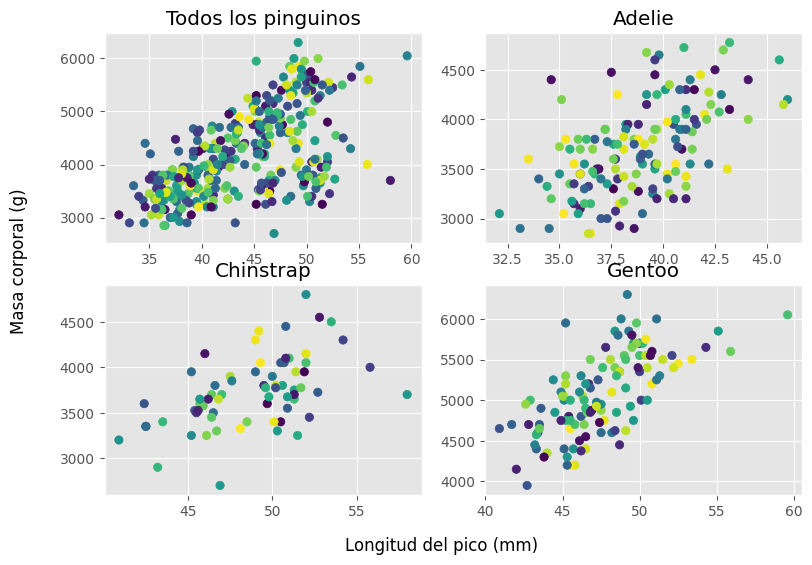

In [16]:
rng = np.random.RandomState(0)
x = rng.randn(333)
y = rng.randn(333)
colors = rng.rand(333)

fig = plt.figure(figsize=(1.5*6,1.5*4))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.scatter(bill_lengths,body_masses,c=colors)
ax2.scatter(bill_lengths_Adelie,body_masses_Adelie,c=rng.rand(len(body_masses_Adelie)))
ax3.scatter(bill_lengths_Chinstrap,body_masses_Chinstrap,c=rng.rand(len(body_masses_Chinstrap)))
ax4.scatter(bill_lengths_Gentoo,body_masses_Gentoo,c=rng.rand(len(body_masses_Gentoo)))

fig.supxlabel("Longitud del pico (mm)")
fig.supylabel("Masa corporal (g)")
ax1.set_title("Todos los pinguinos")
ax2.set_title("Adelie")
ax3.set_title("Chinstrap")
ax4.set_title("Gentoo")
plt.show()

14/15. Es apreciable algun tipo de correlación entre la longitud del pico y la masa corporal cuando se toman en cuenta todos los pingüinos. Pero cuando se observa por especie, no parece haber una relación significativa.

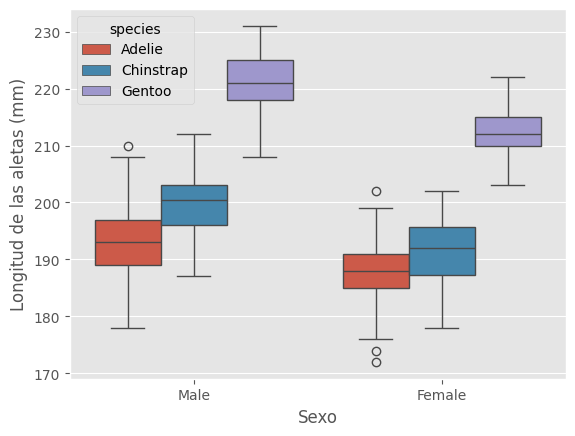

In [17]:
sns.boxplot(data=df,x="sex",y="flipper_length_mm",hue="species")
plt.xlabel("Sexo")
plt.ylabel("Longitud de las aletas (mm)")
plt.show()

16. Los pingüinos Gentoo presentan las aletas más largas, mientras que los Adelie las más pequeñas. En general, se puede concluir que los pingüinos machos suelen tener aletas más largas que sus contrapartes hembras.

**Test de hipótesis**


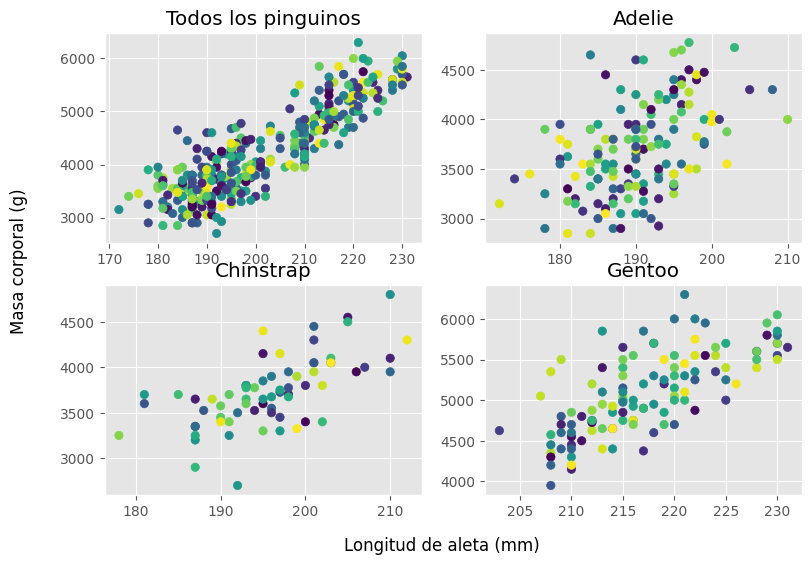

In [18]:
rng = np.random.RandomState(0)
x = rng.randn(333)
y = rng.randn(333)
colors = rng.rand(333)

fig = plt.figure(figsize=(1.5*6,1.5*4))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

ax1.scatter(flipper_lengths,body_masses,c=colors)
ax2.scatter(flipper_lengths_Adelie,body_masses_Adelie,c=rng.rand(len(body_masses_Adelie)))
ax3.scatter(flipper_lengths_Chinstrap,body_masses_Chinstrap,c=rng.rand(len(body_masses_Chinstrap)))
ax4.scatter(flipper_lengths_Gentoo,body_masses_Gentoo,c=rng.rand(len(body_masses_Gentoo)))

fig.supxlabel("Longitud de aleta (mm)")
fig.supylabel("Masa corporal (g)")
ax1.set_title("Todos los pinguinos")
ax2.set_title("Adelie")
ax3.set_title("Chinstrap")
ax4.set_title("Gentoo")
plt.show()

In [23]:
n = len(flipper_lengths)
XY = np.sum(flipper_lengths*body_masses)
X_mean = np.mean(flipper_lengths)
Y_mean = np.mean(body_masses)
S_X = np.std(flipper_lengths)
S_Y = np.std(body_masses)
r = (XY - n*X_mean*Y_mean)/((n-1)*S_X*S_Y)

print(r**2)

alpha = 0.05
t = (r*np.sqrt(n-2))/(np.sqrt(1-r**2))
print(t)

0.7666899879819079
32.98049767395442


17. Se observa una tendencia entre la longitud de las aletas y la masa cuando se toman en cuenta todos los pingüinos. Al encontrarse un valor de coeficiente de determinación $r^2 = 0.7667$, se concluye que $76.67 \%$ de la variación de una de las variables es explicada por la variación de la otra. Luego, como $t >> 0$ se rechaza $H_{0}$ y se concluye que existe una correlación entre las variables.